In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import models.elec_motor_model as elecmotmod
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=18)


In [2]:
# Parameters
abbr = "H65"

In [3]:
preprocess(abbr, verbose=False)
emm_df = elecmotmod.emm_main(abbr)

H65 : Exported ELECMOTMOD CSV in data/runs/H65/models/H65_2023_11_24-11_29_24-SF-boreal04_elecmotmod.csv


/home/damien/code/norlab/terrain-code/venv/lib/python3.10/site-packages/pandas/core/internals/blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)
/home/damien/code/norlab/terrain-code/venv/lib/python3.10/site-packages/pandas/core/internals/blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)
/home/damien/code/norlab/terrain-code/venv/lib/python3.10/site-packages/pandas/core/internals/blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [4]:
print(emm_df.columns.values)

['time' 'time_rel' 'vx' 'vy' 'vz' 'px' 'py' 'pz' 'psi' 'theta' 'phi' 'wz'
 'ax' 'ay' 'az' 'qw' 'qx' 'qy' 'qz' 'cmd_v' 'cmd_w' 'wL' 'wR' 'voltage'
 'V_L' 'V_R' 'current_cpu' 'I_L' 'I_R' 'ax_corr' 'ay_corr' 'az_corr' 'v'
 'a' 'vL' 'vR' 'Vmot_L' 'Vmot_R' 'wmot_L' 'wmot_R' 'Emot_L' 'Emot_R'
 'Imot_L' 'Imot_R' 'PE_L' 'PE_R' 'Tmot_L' 'Tmot_R' 'TL' 'TR' 'PM_L' 'PM_R'
 'P_logical' 'P_motion' 'PE_motion' 'P_total' 'P_mot' 'P_log' 'Ploss_L'
 'Rloss_L' 'Ploss_R' 'Rloss_R' 'eta_L' 'eta_R' 'dI_L' 'dI_R' 'dt' 'dILdt'
 'dIRdt']


In [5]:
model_name = elecmotmod.__MODEL_NAME__.lower()
basename = u.get_basename(u.get_filename(abbr))
figdir = u.get_figdir(basename, subdir=model_name)
model_name = elecmotmod.__MODEL_NAME__.title()
cmap = plt.get_cmap("turbo")

In [13]:
emm_df["Pmot_bias"] = emm_df.P_mot - (emm_df.meta.motor_Kt * emm_df.meta.motor_I_bias * (emm_df.wL))

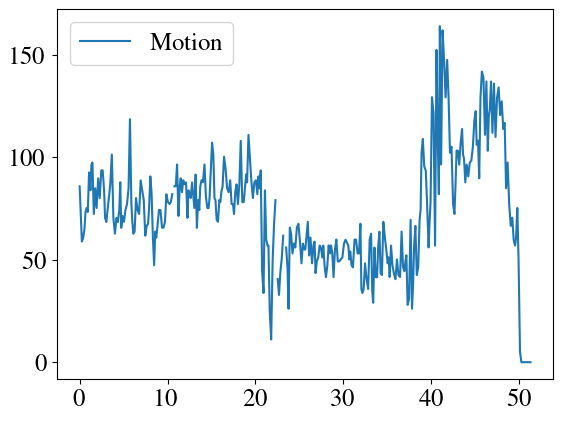

In [15]:
fig, ax = plt.subplots()
ax.plot(emm_df.time_rel, emm_df.P_mot, label="Motion")
ax.plot(emm_df.time_rel, emm_df.Pmot_bias, label="Motion - bias")
ax.legend()

Text(0.02, 0.5, 'Current [A]')

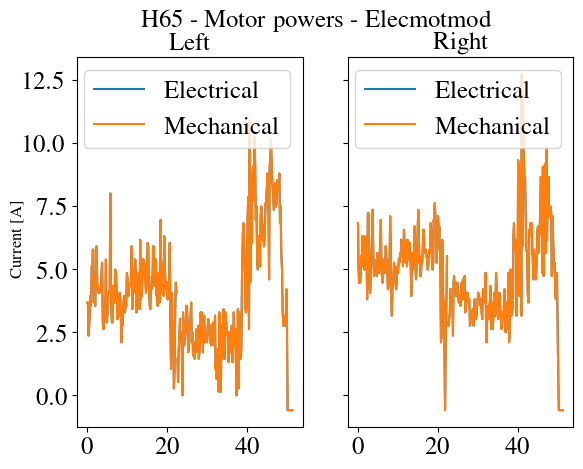

In [9]:
fig, [ax1,ax2] = plt.subplots(ncols=2, sharey=True)
ax1.plot(emm_df.time_rel, emm_df.Imot_L - emm_df.meta.motor_I_bias, label="Electrical")
ax1.plot(emm_df.time_rel, emm_df.Imot_L - emm_df.meta.motor_I_bias, label="Mechanical")
ax2.plot(emm_df.time_rel, emm_df.Imot_R - emm_df.meta.motor_I_bias, label="Electrical")
ax2.plot(emm_df.time_rel, emm_df.Imot_R - emm_df.meta.motor_I_bias, label="Mechanical")
ax1.legend()
ax2.legend()
ax1.set_title("Left")
ax2.set_title("Right")
fig.suptitle(f"{abbr} - Motor powers - {model_name}")
fig.supylabel("Current [A]")